<a href="https://colab.research.google.com/github/Ivette-GR/banco-caja/blob/main/proyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
dfuser=pd.read_csv("/content/drive/My Drive/3.riesgo_relativo/user_info.csv")
df1=pd.read_csv("/content/drive/My Drive/3.riesgo_relativo/loans_outstanding.csv")
df2=pd.read_csv("/content/drive/My Drive/3.riesgo_relativo/loans_detail.csv")
df3=pd.read_csv("/content/drive/My Drive/3.riesgo_relativo/default.csv")
print(df1.info())

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305335 entries, 0 to 305334
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   loan_id    305335 non-null  int64 
 1   user_id    305335 non-null  int64 
 2   loan_type  305335 non-null  object
dtypes: int64(2), object(1)
memory usage: 7.0+ MB
None


In [ ]:
!pip install -U featuretools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.4/754.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.1/236.1 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: holidays
    Found existing installation: holidays 0.38
    Uninstalling holidays-0.38:
      Successfully uninstalled holidays-0.38


In [ ]:
dfuser.head(n=5)

,user_id,age,sex,last_month_salary,number_dependents
0,1,55,F,2200.0,0.0
1,2,44,M,7499.0,0.0
2,3,54,M,5900.0,0.0
3,4,54,F,2167.0,0.0
4,5,42,M,10415.0,2.0


In [ ]:
df1.head(n=5)
df2.head(n=5)

,user_id,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days
0,1,0,0.667083,0,0.153112,0
1,2,0,0.007093,0,0.148800,0
2,3,0,0.091213,0,0.351635,1
3,4,0,0.112680,0,0.065959,0
4,5,0,0.323985,0,0.352151,0


In [ ]:
dfuser.describe()

,user_id,age,last_month_salary,number_dependents
count,36000.000000,36000.000000,2.880100e+04,35057.000000
mean,18000.500000,52.417417,6.675052e+03,0.758080
std,10392.449182,14.791331,1.296178e+04,1.118739
min,1.000000,21.000000,0.000000e+00,0.000000
25%,9000.750000,41.000000,3.400000e+03,0.000000
50%,18000.500000,52.000000,5.400000e+03,0.000000
75%,27000.250000,63.000000,8.300000e+03,1.000000
max,36000.000000,109.000000,1.560100e+06,13.000000


In [ ]:
df1.describe()

,loan_id,user_id
count,305335.000000,305335.000000
mean,152668.000000,18023.509607
std,88142.766559,10347.616388
min,1.000000,1.000000
25%,76334.500000,9051.000000
50%,152668.000000,18046.000000
75%,229001.500000,27002.500000
max,305335.000000,35999.000000


In [ ]:
df2.describe()

,user_id,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,18000.500000,0.260806,5.807040,0.419278,351.580075,0.237861
std,10392.449182,4.121365,223.407144,4.144020,2011.635341,4.105515
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9000.750000,0.000000,0.029526,0.000000,0.176265,0.000000
50%,18000.500000,0.000000,0.149655,0.000000,0.366169,0.000000
75%,27000.250000,0.000000,0.548529,0.000000,0.873552,0.000000
max,36000.000000,98.000000,22000.000000,98.000000,307001.000000,98.000000


In [ ]:
df3.describe()

,user_id,default_flag
count,36000.000000,36000.000000
mean,18000.500000,0.018972
std,10392.449182,0.136429
min,1.000000,0.000000
25%,9000.750000,0.000000
50%,18000.500000,0.000000
75%,27000.250000,0.000000
max,36000.000000,1.000000


In [ ]:
#valores nullos
print(dfuser.isnull().sum())
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())

user_id                 0
age                     0
sex                     0
last_month_salary    7199
number_dependents     943
dtype: int64
loan_id      0
user_id      0
loan_type    0
dtype: int64
user_id                                         0
more_90_days_overdue                            0
using_lines_not_secured_personal_assets         0
number_times_delayed_payment_loan_30_59_days    0
debt_ratio                                      0
number_times_delayed_payment_loan_60_89_days    0
dtype: int64
user_id         0
default_flag    0
dtype: int64


In [ ]:
#duplicadospor filas
duplicates_in_colum=df1[df1['user_id'].duplicated(keep=False)]
print(duplicates_in_colum.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304270 entries, 0 to 305334
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   loan_id    304270 non-null  int64 
 1   user_id    304270 non-null  int64 
 2   loan_type  304270 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB
None


In [ ]:
import pandas as pd
#print(df3 ['default_flag'].astype(bool).to_string())
print(df3.info())
print(dfuser.info())
#df3['default_flag']= df3 ['default_flag'].astype(bool)
#union de tablas
MergedFrame = dfuser.merge(df3, how="left", on=["user_id"])
print(MergedFrame.info())
#print(MergedFrame[MergedFrame["last_month_salary"].isna()].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       36000 non-null  int64
 1   default_flag  36000 non-null  int64
dtypes: int64(2)
memory usage: 562.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            36000 non-null  int64  
 1   age                36000 non-null  int64  
 2   sex                36000 non-null  object 
 3   last_month_salary  28801 non-null  float64
 4   number_dependents  35057 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 35999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------     

In [ ]:
#print(MergedFrame[MergedFrame["last_month_salary"].isna()].info())

#indica True para las filas donde el valor en la columna "last_month_salary" es NaN (Not a Number) y selecciona las filas en que la condicion es verdadera
nullonLMS=MergedFrame[MergedFrame["last_month_salary"].isna()]

print(nullonLMS.info())
total=nullonLMS[nullonLMS["default_flag"]== 1]
#total=sum(nullonLMS.default_flag== 1)
print(total.count())
#LMSandDF=nullonLMS.loc[nullonLMS["default_flag" == True]]
#print(LMSandDF.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7199 entries, 11 to 35989
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            7199 non-null   int64  
 1   age                7199 non-null   int64  
 2   sex                7199 non-null   object 
 3   last_month_salary  0 non-null      float64
 4   number_dependents  6256 non-null   float64
 5   default_flag       7199 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 393.7+ KB
None
user_id              130
age                  130
sex                  130
last_month_salary      0
number_dependents    120
default_flag         130
dtype: int64


In [ ]:
import pandas as pd
print(df2.info())
#union de tablas
MergedFrame2 = dfuser.merge(df2, how="left", on=["user_id"])
MergedFrame3= MergedFrame2.merge (df3, how="left", on=["user_id"])


#print(MergedFrame.info())
print(MergedFrame3.info())

total_rows = MergedFrame3.shape[0]
#filtrado de tablas
FilteredFrame1=MergedFrame3[(MergedFrame3['debt_ratio']>1) & (MergedFrame3['last_month_salary'].isnull()) & (MergedFrame3['default_flag']==1) & (MergedFrame3['using_lines_not_secured_personal_assets']>1) ]


print(FilteredFrame1.to_string())
print(FilteredFrame1.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   more_90_days_overdue                          36000 non-null  int64  
 2   using_lines_not_secured_personal_assets       36000 non-null  float64
 3   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 4   debt_ratio                                    36000 non-null  float64
 5   number_times_delayed_payment_loan_60_89_days  36000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.6 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 35999
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --

In [ ]:
import pandas as pd
print(df2.info())
#union de tablas
MergedFrame2 = dfuser.merge(df2, how="left", on=["user_id"])
MergedFrame3= MergedFrame2.merge (df3, how="left", on=["user_id"])

#union de tablas y filtro para verificacion y toma de deciones
#print(MergedFrame.info())
print(MergedFrame3.info())

total_rows = MergedFrame3.shape[0]
#filtrado de tablas
FilteredFrame1=MergedFrame3[(MergedFrame3['debt_ratio']>9) & (MergedFrame3['last_month_salary'].isnull()) & (MergedFrame3['default_flag']==1) ]


print(FilteredFrame1.to_string())
print(FilteredFrame1.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   more_90_days_overdue                          36000 non-null  int64  
 2   using_lines_not_secured_personal_assets       36000 non-null  float64
 3   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 4   debt_ratio                                    36000 non-null  float64
 5   number_times_delayed_payment_loan_60_89_days  36000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.6 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 35999
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --

In [ ]:
import pandas as pd
from copy import copy
print(df2.info())
#union de tablas
dfUsertoMerge=copy(dfuser)
MergedFrame2 = dfUsertoMerge.merge(df2, how="left", on=["user_id"])
MergedFrame3= MergedFrame2.merge (df3, how="left", on=["user_id"])


#print(MergedFrame.info())
print(MergedFrame3.info())

total_rows = MergedFrame3.shape[0]
#filtrado de tablas
FilteredFrame1=MergedFrame3[(MergedFrame3['using_lines_not_secured_personal_assets']>1)  ]


print(FilteredFrame1.to_string())
print(FilteredFrame1.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   more_90_days_overdue                          36000 non-null  int64  
 2   using_lines_not_secured_personal_assets       36000 non-null  float64
 3   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 4   debt_ratio                                    36000 non-null  float64
 5   number_times_delayed_payment_loan_60_89_days  36000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.6 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 35999
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --

In [ ]:
#pivot de tabla


import pandas as pd
import numpy as np
import re
from copy import copy  #Para crear una copia completamente

#creacion de loan realstate y loan others
#dfouts=df1
#dfouts=pd.DataFrame(data)
print(df1)
normalizedDF1=copy(df1)
print(normalizedDF1)
#normalizedDF1["loan_type"== "OTHERS"]="OTHER"


normalizedDF1["loan_type"]=normalizedDF1["loan_type"].str.upper()
normalizedDF1.loc[ normalizedDF1["loan_type"] == "OTHERS", "loan_type"] = "OTHER"

#normalizedDF1.drop(columns=['False'])
print("Normalized info")
print(normalizedDF1.info())

pivotDF1=pd.pivot_table(normalizedDF1, index='user_id', columns='loan_type', aggfunc="count")
DataframeFromPivot=pivotDF1.reset_index()
DataframeFromPivot.columns = ['user_id', 'OTHER', 'REAL_ESTATE']
print(pivotDF1)
print(DataframeFromPivot)


        loan_id  user_id    loan_type
0             1        2  real estate
1             2        3  real estate
2             3        5  REAL ESTATE
3             4        5  real estate
4             5        8  real estate
...         ...      ...          ...
305330   305331    35999        other
305331   305332    35999        other
305332   305333    35999        OTHER
305333   305334    35999        Other
305334   305335    35999       others

[305335 rows x 3 columns]
        loan_id  user_id    loan_type
0             1        2  real estate
1             2        3  real estate
2             3        5  REAL ESTATE
3             4        5  real estate
4             5        8  real estate
...         ...      ...          ...
305330   305331    35999        other
305331   305332    35999        other
305332   305333    35999        OTHER
305333   305334    35999        Other
305334   305335    35999       others

[305335 rows x 3 columns]
Normalized info
<class 'pandas.cor

In [ ]:
import pandas as pd
import numpy as np
import re
#union de la tabla dfuser, df2 y df3 y df 1 que es = DataframeFromPivot
MergedFrame11=dfuser.merge(df2, how="left", on=["user_id"])
#print(MergedFrame11.info())
MergedFrame12=MergedFrame11.merge(df3, how="left", on=["user_id"])
#print(MergedFrame12.info())
total_tabla= MergedFrame12.merge(DataframeFromPivot, how="left", on=["user_id"])


print(total_tabla.info())
#print(total_tabla.count())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 35999
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   age                                           36000 non-null  int64  
 2   sex                                           36000 non-null  object 
 3   last_month_salary                             28801 non-null  float64
 4   number_dependents                             35057 non-null  float64
 5   more_90_days_overdue                          36000 non-null  int64  
 6   using_lines_not_secured_personal_assets       36000 non-null  float64
 7   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 8   debt_ratio                                    36000 non-null  float64
 9   number_times_delayed_payment_loan_60_89_days  36000 non-null 

In [ ]:
import pandas as pd
import numpy as np
import re
from copy import copy  #Para crear una copia completamente
#se uso para eliminar nullos pero falto evaluar realmente como se deberian manejar estos outliers and nulls

#c_tabla=copy(total_tabla)
#Eliminacion de nullos
#"last_month_salary":0.0
#values={"number_dependents":0, "OTHER":0, "REAL_ESTATE":0 }

#c_tabla=c_tabla.fillna(values==values) #los pasa a booleanos
#c_tabla=c_tabla[].fillna()
#print(c_tabla.info())

#c_tabla['last_month_salary']=c_tabla['last_month_salary'].astype(float)
#c_tabla['number_dependents']=c_tabla['number_dependents'].astype(np.int64)
#c_tabla['OTHER']=c_tabla['OTHER'].astype(np.int64)
#c_tabla['REAL_ESTATE']=c_tabla['REAL_ESTATE'].astype(np.int64)

p#rint(c_tabla.info())

NameError: ignored

esta tabla lo que hace la funcion c_tabla=c_tabla.fillna(values==values) es crear booleanos por eso los tenia que cambiar a que eran un tipo int64, por que los pasaba a booleanos

In [ ]:
import pandas as pd
import numpy as np

#c_tabla.insert==(loc==1, column='total_loans', value=[c_tabla.loc('OTHER','REAL_ESTATE').sum(axis=1)])
#c_tabla.insert("total_loans"=(c_tabla['OTHER']+c_tabla['REAL_ESTATE']))
total_tabla["total_loans"]=total_tabla['OTHER']+total_tabla['REAL_ESTATE']
print(total_tabla.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 35999
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   age                                           36000 non-null  int64  
 2   sex                                           36000 non-null  object 
 3   last_month_salary                             28801 non-null  float64
 4   number_dependents                             35057 non-null  float64
 5   more_90_days_overdue                          36000 non-null  int64  
 6   using_lines_not_secured_personal_assets       36000 non-null  float64
 7   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 8   debt_ratio                                    36000 non-null  float64
 9   number_times_delayed_payment_loan_60_89_days  36000 non-null 

In [ ]:
total_tabla.describe()

,user_id,age,last_month_salary,number_dependents,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,default_flag,OTHER,REAL_ESTATE,total_loans
count,36000.000000,36000.000000,2.880100e+04,35057.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,35485.000000,22456.000000,22366.000000
mean,18000.500000,52.417417,6.675052e+03,0.758080,0.260806,5.807040,0.419278,351.580075,0.237861,0.018972,7.574271,1.628162,10.005321
std,10392.449182,14.791331,1.296178e+04,1.118739,4.121365,223.407144,4.144020,2011.635341,4.105515,0.136429,4.748991,1.003870,5.073863
min,1.000000,21.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,9000.750000,41.000000,3.400000e+03,0.000000,0.000000,0.029526,0.000000,0.176265,0.000000,0.000000,4.000000,1.000000,6.000000
50%,18000.500000,52.000000,5.400000e+03,0.000000,0.000000,0.149655,0.000000,0.366169,0.000000,0.000000,7.000000,1.000000,9.000000
75%,27000.250000,63.000000,8.300000e+03,1.000000,0.000000,0.548529,0.000000,0.873552,0.000000,0.000000,10.000000,2.000000,13.000000
max,36000.000000,109.000000,1.560100e+06,13.000000,98.000000,22000.000000,98.000000,307001.000000,98.000000,1.000000,56.000000,25.000000,57.000000


In [ ]:
%matplotlib inline

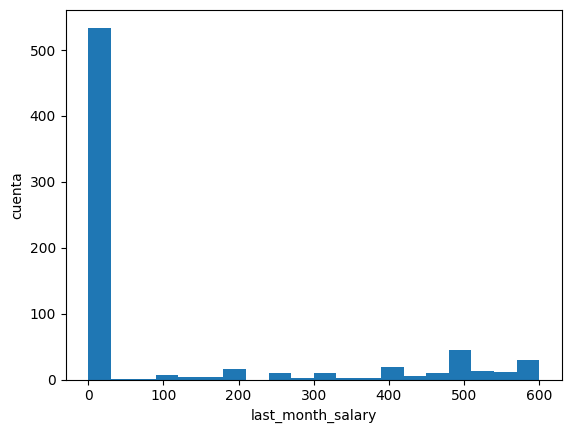

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#print(total_tabla['last_month_salary'].fillna(0).values.tolist())
#print(total_tabla['last_month_salary'].to_numpy())

#plt.hist(total_tabla['user_id','last_month_salary'].fillna(0).values.tolist())#, bins=6, color='gold', alpha=1)
#plt.hist(total_tabla['last_month_salary'].to_numpy())
#plt.title('Histograma last_month_salary')


#bins=total_tabla['last_month_salary'].quantile([0.0,0.10,.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.60,0.65,.70,0.75,.80,0.85,.90,0.95,1.0]).to_list()
plt.hist(total_tabla['last_month_salary'],bins=range(0,630,30))
plt.xlabel("last_month_salary")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

Text(0, 0.5, 'recuento')

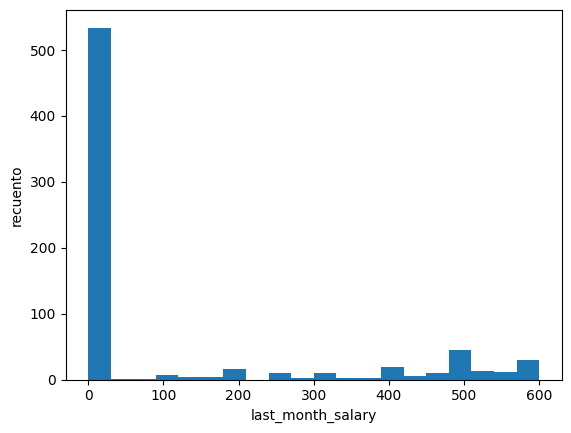

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

chol = total_tabla["last_month_salary"]

plt.hist(chol.apply(lambda x: np.mean(chol) if np.isnan(x) else x), bins=range(0,630,30))

plt.xlabel("last_month_salary")

plt.ylabel("recuento")

Text(0, 0.5, 'recuento')

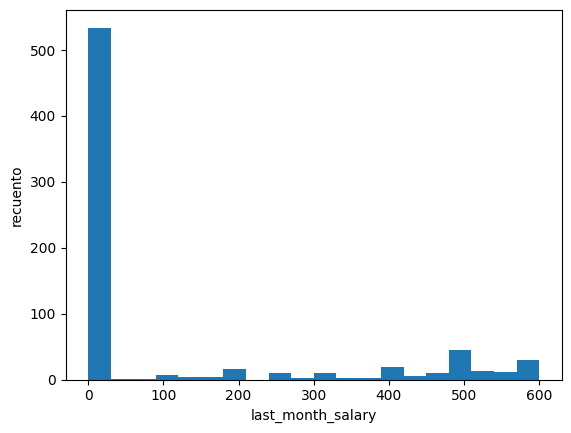

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

chol = total_tabla["last_month_salary"]

plt.hist(chol.apply(lambda x: np.median(chol) if np.isnan(x) else x), bins=range(0,630,30))

plt.xlabel("last_month_salary")

plt.ylabel("recuento")

<Axes: >

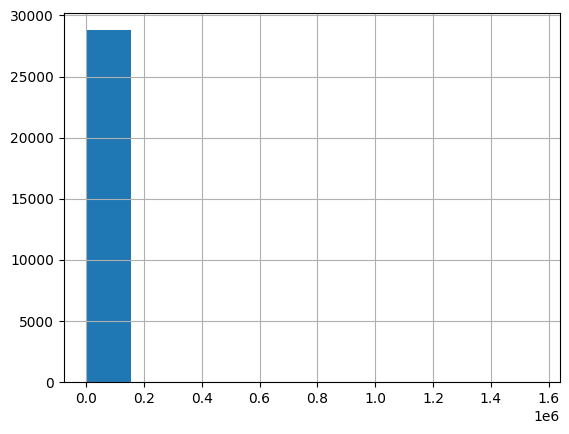

In [ ]:
#para hacer histograma sin complicaciones

total_tabla.last_month_salary.hist()

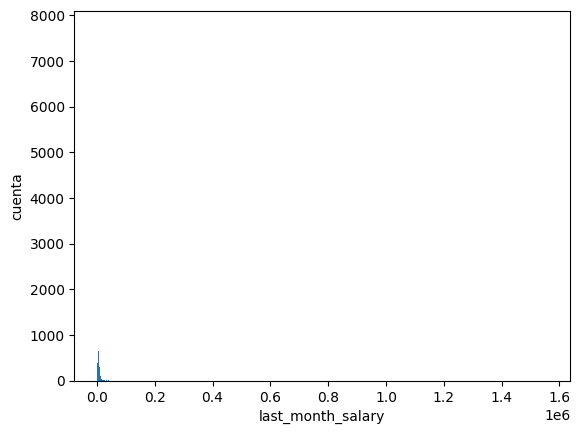

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
last_month_salary1=total_tabla ["last_month_salary"]

plt.hist(last_month_salary1.apply(lambda x: np.mean(last_month_salary1) if np.isnan(x) else x),bins=7200)
plt.xlabel("last_month_salary")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'last_month_salary'
datos = total_tabla['last_month_salary'].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)
# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')
# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de Shapiro: 0.1594531536102295
P-valor: 0.0
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
import pandas as pd
import numpy as np
#calculo de outliers
# Calculate the percentiles
seventy_fifth =total_tabla ['last_month_salary'].quantile(0.75)
twenty_fifth = total_tabla['last_month_salary'].quantile(0.25)

# Obtain IQR
iqr = seventy_fifth - twenty_fifth

# Upper and lower thresholds
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subset the dataset
outliers = total_tabla[(total_tabla['last_month_salary'] < lower) | (total_tabla['last_month_salary'] > upper)]
outliers.head()
#print(outliers)
#print(outliers.to_string())


,user_id,age,sex,last_month_salary,number_dependents,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,default_flag,OTHER,REAL_ESTATE,total_loans
7,8,55,M,15658.0,0.0,1,0.062280,0,0.406667,0,0,11.0,3.0,14.0
87,88,44,M,51140.0,3.0,2,0.873251,0,0.021001,0,0,6.0,1.0,7.0
121,122,64,M,32000.0,0.0,0,0.012248,0,0.001406,0,0,3.0,NaN,NaN
140,141,64,F,30452.0,0.0,0,0.000000,0,0.036351,0,0,2.0,NaN,NaN
163,164,62,F,17750.0,3.0,0,0.056999,0,0.116106,0,0,17.0,1.0,18.0


In [ ]:
# Obtain number of outliers
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 1170


In [ ]:
import pandas as pd
import numpy as np
#calculo de outliers
# Calculate the percentiles
seventy_fifth =total_tabla ['age'].quantile(0.75)
twenty_fifth = total_tabla['age'].quantile(0.25)

# Obtain IQR
iqr = seventy_fifth - twenty_fifth

# Upper and lower thresholds
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subset the dataset
outliers2 = total_tabla[(total_tabla['age'] < lower) | (total_tabla['age'] > upper)]
outliers2.head()
#print(outliers2)
#print(outliers2.to_string())


,user_id,age,sex,last_month_salary,number_dependents,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,default_flag,OTHER,REAL_ESTATE,total_loans
134,135,109,M,NaN,NaN,0,0.246529,0,318.000000,0,0,3.0,NaN,NaN
1275,1276,98,F,950.0,0.0,0,0.009191,1,0.634069,0,0,7.0,1.0,8.0
2168,2169,97,M,3287.0,0.0,1,0.006250,0,0.000912,0,0,4.0,NaN,NaN
6585,6586,101,F,2883.0,0.0,0,0.002964,2,0.001387,0,0,6.0,NaN,NaN
13660,13661,97,F,1500.0,0.0,0,0.001583,0,0.001999,1,0,15.0,NaN,NaN


In [ ]:
# Obtain number of outliers
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 1170


In [ ]:
!pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190292 sha256=56155db9bf4ebf1c4ad6d374e9b556bf01840631e09c2425446ffd4936f5b15a
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


este es el instalador de pyod

In [ ]:
# Import MAD estimator
from pyod.models.mad import MAD
#zscore modificado outliers calculados
# Set threshold to 3.5
mad = MAD(threshold = 3.5)

# Convert the 'total' column into a 2D numpy array
total_tabla1 = total_tabla['last_month_salary'].values.reshape(-1, 1)

# Generate inline and outlier labels
labels = mad.fit(total_tabla1).labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Obtain number of outliers
print(f'Number of outliers: {labels.sum()}')

Number of outliers: 793


In [ ]:
outliers = total_tabla[labels == 1]
outliers.head()

,user_id,age,sex,last_month_salary,number_dependents,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,default_flag,OTHER,REAL_ESTATE,total_loans


In [ ]:
# Import MAD estimator
from pyod.models.mad import MAD
#zscore modificado outliers calculados
# Set threshold to 3.5
mad = MAD(threshold = 3.5)

# Convert the 'total' column into a 2D numpy array
total_tabla1 = total_tabla['age'].values.reshape(-1, 1)

# Generate inline and outlier labels
labels = mad.fit(total_tabla1).labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Obtain number of outliers
print(f'Number of outliers: {labels.sum()}')

Number of outliers: 0


Text(0.5, 0, 'Total paid per trip')

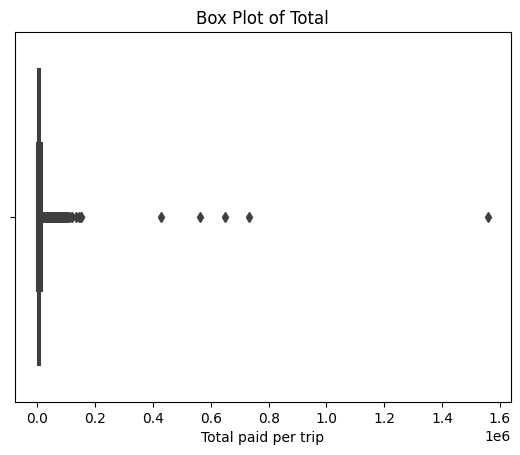

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
g = sns.boxplot(data = total_tabla, x = 'last_month_salary')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('Total paid per trip')

In [ ]:
import pandas as pd
import numpy as np
#calculo de outliers
# Calculate the percentiles
last_month_salary=dfuser ["last_month_salary"]

Q1 = np.percentile(last_month_salary, .25)
Q3 = np.percentile(last_month_salary, .75)


# Upper and lower thresholds
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Filter out the outliers
filtered_last_month_salary = [num for num in last_month_salary if lower <= num <= upper]

# Calculate the median
median = np.median(filtered_last_month_salary)

print("The median of the data is: ", median)


The median of the data is:  27.5


no reproducir, dejar ya el calculo

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import re
from copy import copy  #Para crear una copia completamente
#se realizo copia de total_tabla a tabla_limpia

tabla_limpia=copy(total_tabla)


debt_ratio=tabla_limpia ["debt_ratio"]
# Print the first few rows of the 'my_column' column before the update
print("Before update:")
print(tabla_limpia['debt_ratio'].head())

# Define a custom function to update the values
def update_value(debt_ratio):
    if debt_ratio > 1:
        return 1
    else:
        return debt_ratio

# Update the values of the 'my_column' column using the custom function
tabla_limpia['debt_ratio'] = tabla_limpia['debt_ratio'].apply(update_value)
print("\nAfter update:")
#print(total_tabla['debt_ratio'].head(10))
tabla_limpia.head(5)

Before update:
0    0.153112
1    0.148800
2    0.351635
3    0.065959
4    0.352151
Name: debt_ratio, dtype: float64

After update:


,user_id,age,sex,last_month_salary,number_dependents,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,default_flag,OTHER,REAL_ESTATE,total_loans
0,1,55,F,2200.0,0.0,0,0.667083,0,0.153112,0,0,3.0,NaN,NaN
1,2,44,M,7499.0,0.0,0,0.007093,0,0.148800,0,0,19.0,1.0,20.0
2,3,54,M,5900.0,0.0,0,0.091213,0,0.351635,1,0,14.0,1.0,15.0
3,4,54,F,2167.0,0.0,0,0.112680,0,0.065959,0,0,3.0,NaN,NaN
4,5,42,M,10415.0,2.0,0,0.323985,0,0.352151,0,0,6.0,2.0,8.0


Se cambiaron los deb ratio a 1 los que excedian de 1, ya que habian datos muy altos elevados a mas de 1, para homologar se considero que debian ser pasados a 1, y considerarse endeudados

In [ ]:
import pandas as pd
using_lines_not_secured_personal_assets=tabla_limpia["using_lines_not_secured_personal_assets"]
# Print the first few rows of the 'my_column' column before the update
print("Before update:")
print(tabla_limpia['using_lines_not_secured_personal_assets'].head())

# Define a custom function to update the values
def update_value(using_lines_not_secured_personal_assets):
    if using_lines_not_secured_personal_assets > 1:
        return 1
    else:
        return using_lines_not_secured_personal_assets

# Update the values of the 'my_column' column using the custom function
tabla_limpia['using_lines_not_secured_personal_assets'] = tabla_limpia['using_lines_not_secured_personal_assets'].apply(update_value)
print("\nAfter update:")
#print(total_tabla['using_lines_not_secured_personal_assets'].head(20))
tabla_limpia.head(135)

Before update:
0    0.667083
1    0.007093
2    0.091213
3    0.112680
4    0.323985
Name: using_lines_not_secured_personal_assets, dtype: float64

After update:


,user_id,age,sex,last_month_salary,number_dependents,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,default_flag,OTHER,REAL_ESTATE,total_loans
0,1,55,F,2200.0,0.0,0,0.667083,0,0.153112,0,0,3.0,NaN,NaN
1,2,44,M,7499.0,0.0,0,0.007093,0,0.148800,0,0,19.0,1.0,20.0
2,3,54,M,5900.0,0.0,0,0.091213,0,0.351635,1,0,14.0,1.0,15.0
3,4,54,F,2167.0,0.0,0,0.112680,0,0.065959,0,0,3.0,NaN,NaN
4,5,42,M,10415.0,2.0,0,0.323985,0,0.352151,0,0,6.0,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,131,35,M,NaN,0.0,0,1.000000,0,1.000000,0,0,1.0,2.0,3.0
131,132,56,M,NaN,0.0,0,0.066053,0,1.000000,0,0,5.0,1.0,6.0
132,133,52,F,4500.0,2.0,0,0.021608,0,0.395023,0,0,10.0,1.0,11.0
133,134,39,M,2608.0,2.0,0,0.182724,0,0.129935,0,0,5.0,NaN,NaN


In [ ]:
tabla_limpia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 35999
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   age                                           36000 non-null  int64  
 2   sex                                           36000 non-null  object 
 3   last_month_salary                             28801 non-null  float64
 4   number_dependents                             35057 non-null  float64
 5   more_90_days_overdue                          36000 non-null  int64  
 6   using_lines_not_secured_personal_assets       36000 non-null  float64
 7   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 8   debt_ratio                                    36000 non-null  float64
 9   number_times_delayed_payment_loan_60_89_days  36000 non-null 

In [ ]:
import pandas as pd
import numpy as np
import re
tabla_limpia.info()
#print(tabla_limpia.fillna('last_month_salary',5200.00, inplace=True))
#print(tabla_limpia["last_month_salary"].fillna(5200.00).to_string())
tabla_limpia["last_month_salary"]=tabla_limpia["last_month_salary"].fillna(5200.00)
print(tabla_limpia["last_month_salary"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 35999
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   age                                           36000 non-null  int64  
 2   sex                                           36000 non-null  object 
 3   last_month_salary                             28801 non-null  float64
 4   number_dependents                             35057 non-null  float64
 5   more_90_days_overdue                          36000 non-null  int64  
 6   using_lines_not_secured_personal_assets       36000 non-null  float64
 7   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 8   debt_ratio                                    36000 non-null  float64
 9   number_times_delayed_payment_loan_60_89_days  36000 non-null 

In [ ]:
import pandas as pd
import numpy as np
import re


tabla_limpia["number_dependents"]=tabla_limpia["number_dependents"].fillna(0)
tabla_limpia["OTHER"]=tabla_limpia["OTHER"].fillna(0)
tabla_limpia["REAL_ESTATE"]=tabla_limpia["REAL_ESTATE"].fillna(0)
tabla_limpia["total_loans"]=tabla_limpia["total_loans"].fillna(0)
tabla_limpia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 35999
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   age                                           36000 non-null  int64  
 2   sex                                           36000 non-null  object 
 3   last_month_salary                             36000 non-null  float64
 4   number_dependents                             36000 non-null  float64
 5   more_90_days_overdue                          36000 non-null  int64  
 6   using_lines_not_secured_personal_assets       36000 non-null  float64
 7   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 8   debt_ratio                                    36000 non-null  float64
 9   number_times_delayed_payment_loan_60_89_days  36000 non-null 

In [ ]:
#filtrado de los que tienen mas de 89 años

tabla_limpia=(tabla_limpia[tabla_limpia.age<=89])
tabla_limpia=(tabla_limpia[tabla_limpia.last_month_salary<1560100.00])
tabla_limpia=(tabla_limpia[tabla_limpia.more_90_days_overdue<90])
tabla_limpia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35755 entries, 0 to 35999
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       35755 non-null  int64  
 1   age                                           35755 non-null  int64  
 2   sex                                           35755 non-null  object 
 3   last_month_salary                             35755 non-null  float64
 4   number_dependents                             35755 non-null  float64
 5   more_90_days_overdue                          35755 non-null  int64  
 6   using_lines_not_secured_personal_assets       35755 non-null  float64
 7   number_times_delayed_payment_loan_30_59_days  35755 non-null  int64  
 8   debt_ratio                                    35755 non-null  float64
 9   number_times_delayed_payment_loan_60_89_days  35755 non-null 

In [ ]:
tabla_limpia.head(135)

,user_id,age,sex,last_month_salary,number_dependents,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,default_flag,OTHER,REAL_ESTATE,total_loans
0,1,55,F,2200.0,0.0,0,0.667083,0,0.153112,0,0,3.0,0.0,0.0
1,2,44,M,7499.0,0.0,0,0.007093,0,0.148800,0,0,19.0,1.0,20.0
2,3,54,M,5900.0,0.0,0,0.091213,0,0.351635,1,0,14.0,1.0,15.0
3,4,54,F,2167.0,0.0,0,0.112680,0,0.065959,0,0,3.0,0.0,0.0
4,5,42,M,10415.0,2.0,0,0.323985,0,0.352151,0,0,6.0,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,52,F,4500.0,2.0,0,0.021608,0,0.395023,0,0,10.0,1.0,11.0
133,134,39,M,2608.0,2.0,0,0.182724,0,0.129935,0,0,5.0,0.0,0.0
135,136,50,F,7000.0,0.0,0,0.093200,0,0.579489,0,0,8.0,4.0,12.0
136,137,46,M,10000.0,0.0,0,0.180525,0,0.084592,0,0,2.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
tabla_corr=copy(total_tabla)
tabla_corr=tabla_corr.loc[:,['age','last_month_salary','using_lines_not_secured_personal_assets','more_90_days_overdue', 'number_times_delayed_payment_loan_30_59_days','number_times_delayed_payment_loan_60_89_days' ,'debt_ratio','total_loans']]
corr_matrix=tabla_corr.corr(method='pearson')
corr_matrix

,age,last_month_salary,using_lines_not_secured_personal_assets,more_90_days_overdue,number_times_delayed_payment_loan_30_59_days,number_times_delayed_payment_loan_60_89_days,debt_ratio,total_loans
age,1.000000,0.035978,-0.007584,-0.059913,-0.062548,-0.056340,0.020729,0.120755
last_month_salary,0.035978,1.000000,0.007542,-0.013620,-0.011661,-0.010999,-0.025118,0.069198
using_lines_not_secured_personal_assets,-0.007584,0.007542,1.000000,-0.001361,-0.001250,-0.000772,0.015012,-0.023592
more_90_days_overdue,-0.059913,-0.013620,-0.001361,1.000000,0.982917,0.992176,-0.008208,-0.044094
number_times_delayed_payment_loan_30_59_days,-0.062548,-0.011661,-0.001250,0.982917,1.000000,0.986554,-0.005223,0.067021
number_times_delayed_payment_loan_60_89_days,-0.056340,-0.010999,-0.000772,0.992176,0.986554,1.000000,-0.007402,-0.014901
debt_ratio,0.020729,-0.025118,0.015012,-0.008208,-0.005223,-0.007402,1.000000,0.017015
total_loans,0.120755,0.069198,-0.023592,-0.044094,0.067021,-0.014901,0.017015,1.000000


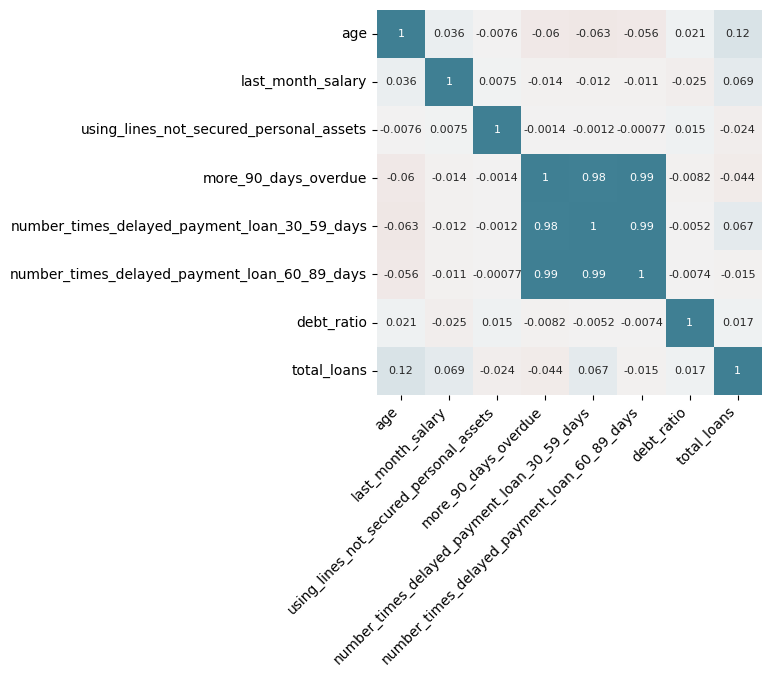

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


total_tabla.corr('pearson')





<ipython-input-47-b76d6d7a2bec>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_tabla.corr('pearson')


,user_id,age,last_month_salary,number_dependents,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,default_flag,OTHER,REAL_ESTATE,total_loans
user_id,1.000000,0.004921,-0.002099,0.000385,-0.000467,-0.006669,-0.001310,0.000472,-0.000965,-0.010582,0.004589,-0.011286,-0.003802
age,0.004921,1.000000,0.035978,-0.216612,-0.059913,-0.007584,-0.062548,0.020729,-0.056340,-0.078218,0.139717,-0.009674,0.120755
last_month_salary,-0.002099,0.035978,1.000000,0.077996,-0.013620,0.007542,-0.011661,-0.025118,-0.010999,-0.021944,0.075579,0.110332,0.069198
number_dependents,0.000385,-0.216612,0.077996,1.000000,-0.007445,0.008502,-0.001196,-0.033426,-0.008361,0.031926,0.037384,0.038174,0.005452
more_90_days_overdue,-0.000467,-0.059913,-0.013620,-0.007445,1.000000,-0.001361,0.982917,-0.008208,0.992176,0.307485,-0.055379,-0.000389,-0.044094
using_lines_not_secured_personal_assets,-0.006669,-0.007584,0.007542,0.008502,-0.001361,1.000000,-0.001250,0.015012,-0.000772,-0.002932,-0.017198,-0.005354,-0.023592
number_times_delayed_payment_loan_30_59_days,-0.001310,-0.062548,-0.011661,-0.001196,0.982917,-0.001250,1.000000,-0.005223,0.986554,0.299208,0.055137,0.045509,0.067021
debt_ratio,0.000472,0.020729,-0.025118,-0.033426,-0.008208,0.015012,-0.005223,1.000000,-0.007402,-0.007502,0.029687,0.078826,0.017015
number_times_delayed_payment_loan_60_89_days,-0.000965,-0.056340,-0.010999,-0.008361,0.992176,-0.000772,0.986554,-0.007402,1.000000,0.278254,-0.014593,0.000821,-0.014901
default_flag,-0.010582,-0.078218,-0.021944,0.031926,0.307485,-0.002932,0.299208,-0.007502,0.278254,1.000000,-0.040272,0.013394,-0.031070


In [ ]:
tabla_limpia.describe()

,user_id,age,last_month_salary,number_dependents,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,default_flag,OTHER,REAL_ESTATE,total_loans
count,35755.000000,35755.000000,35755.000000,35755.000000,35755.00000,35755.000000,35755.000000,35755.000000,35755.00000,35755.000000,35755.000000,35755.000000,35755.000000
mean,18004.106810,52.248497,6349.047518,0.742246,0.08975,0.315480,0.249112,0.467931,0.06676,0.017676,7.490701,1.021535,6.252496
std,10394.598969,14.540253,8253.267882,1.112517,0.50007,0.346474,0.702049,0.354664,0.33371,0.131772,4.796816,1.119146,6.289523
min,1.000000,21.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,9004.500000,41.000000,3910.500000,0.000000,0.00000,0.030072,0.000000,0.178187,0.00000,0.000000,4.000000,0.000000,0.000000
50%,18005.000000,52.000000,5200.000000,0.000000,0.00000,0.150628,0.000000,0.366782,0.00000,0.000000,7.000000,1.000000,6.000000
75%,27009.500000,63.000000,7451.000000,1.000000,0.00000,0.547680,0.000000,0.870415,0.00000,0.000000,10.000000,2.000000,10.000000
max,36000.000000,89.000000,730483.000000,13.000000,15.00000,1.000000,11.000000,1.000000,7.00000,1.000000,56.000000,25.000000,57.000000


In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'last_month_salary'
datos = tabla_limpia['last_month_salary'].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)
# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')
# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de Shapiro: 0.27466005086898804
P-valor: 0.0
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5, 0, 'Total paid per trip')

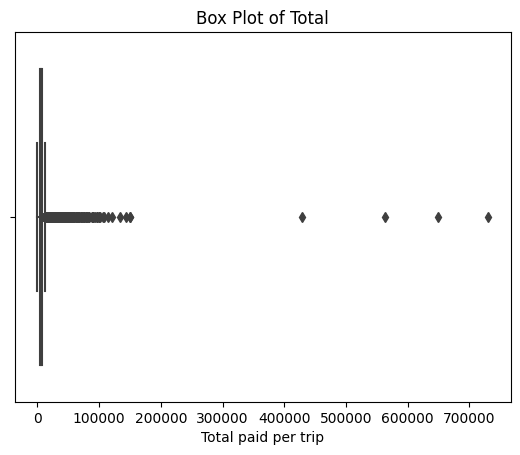

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
g = sns.boxplot(data = tabla_limpia, x = 'last_month_salary')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('Total paid per trip')

Text(0.5, 0, 'Total paid per trip')

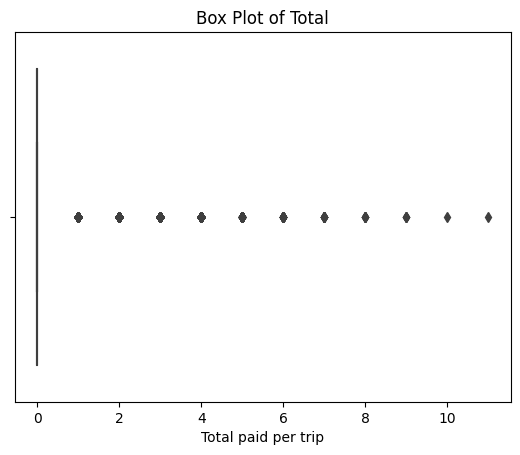

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
g = sns.boxplot(data = tabla_limpia, x = 'number_times_delayed_payment_loan_30_59_days')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('Total paid per trip')

Text(0.5, 1.0, 'age')

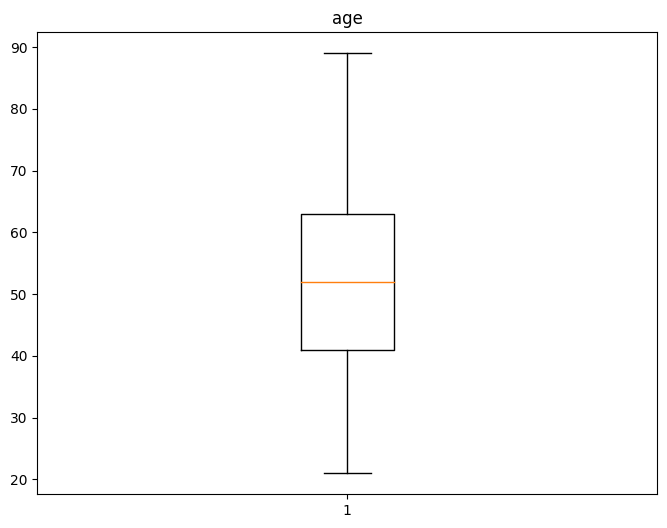

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
fig = plt.figure(figsize=(8,6))
#tabla_limpiaTX = tabla_limpia[tabla_limpia["age"]=="TX"].tail(-1)
plt.boxplot(tabla_limpia['age'])
plt.title("age")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kendalltau
tabla_corr=copy(total_tabla)
tabla_corr=tabla_corr.loc[:,['age','last_month_salary','using_lines_not_secured_personal_assets','more_90_days_overdue', 'number_times_delayed_payment_loan_30_59_days','number_times_delayed_payment_loan_60_89_days' ,'debt_ratio','total_loans']]
corr_matrix_spe=tabla_corr.corr(method='kendall')
corr_matrix_spe

,age,last_month_salary,using_lines_not_secured_personal_assets,more_90_days_overdue,number_times_delayed_payment_loan_30_59_days,number_times_delayed_payment_loan_60_89_days,debt_ratio,total_loans
age,1.000000,0.091755,-0.195156,-0.084820,-0.078420,-0.067937,0.021774,0.087345
last_month_salary,0.091755,1.000000,-0.050858,-0.077718,-0.019403,-0.042029,-0.089166,0.123180
using_lines_not_secured_personal_assets,-0.195156,-0.050858,1.000000,0.196967,0.192623,0.154040,0.055027,0.012744
more_90_days_overdue,-0.084820,-0.077718,0.196967,1.000000,0.250879,0.321352,-0.022402,-0.055546
number_times_delayed_payment_loan_30_59_days,-0.078420,-0.019403,0.192623,0.250879,1.000000,0.275860,0.033641,0.056932
number_times_delayed_payment_loan_60_89_days,-0.067937,-0.042029,0.154040,0.321352,0.275860,1.000000,0.000575,-0.018881
debt_ratio,0.021774,-0.089166,0.055027,-0.022402,0.033641,0.000575,1.000000,0.044370
total_loans,0.087345,0.123180,0.012744,-0.055546,0.056932,-0.018881,0.044370,1.000000


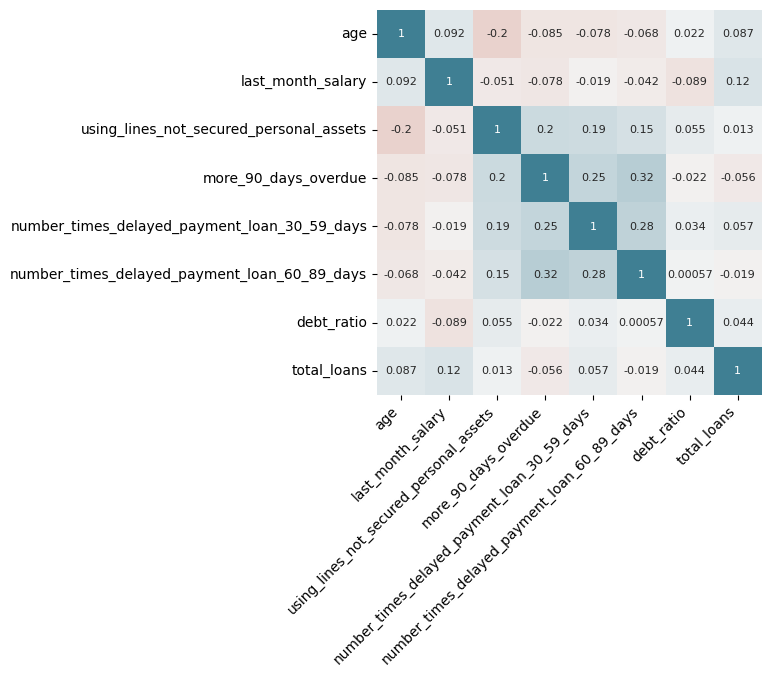

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.heatmap(
    corr_matrix_spe,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

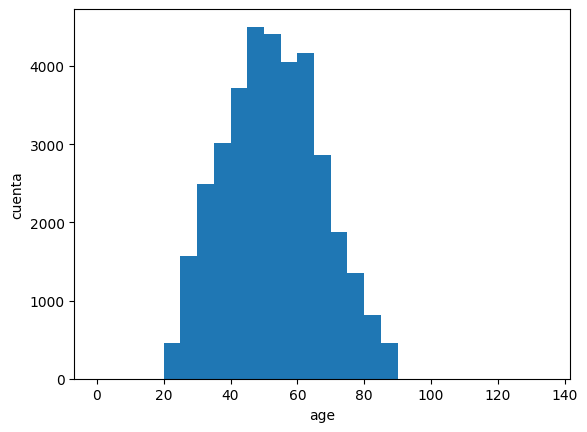

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#bins=total_tabla['last_month_salary'].quantile([0.0,0.10,.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.60,0.65,.70,0.75,.80,0.85,.90,0.95,1.0]).to_list()
plt.hist(tabla_limpia['age'],bins=range(0,140,5))
plt.xlabel("age")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

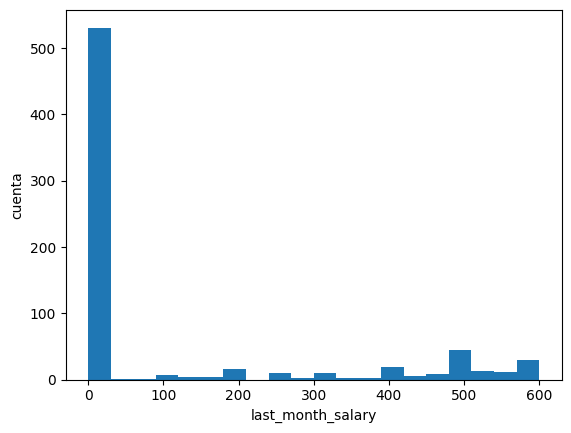

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#bins=total_tabla['last_month_salary'].quantile([0.0,0.10,.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.60,0.65,.70,0.75,.80,0.85,.90,0.95,1.0]).to_list()
plt.hist(tabla_limpia['last_month_salary'],bins=range(0,630,30))
plt.xlabel("last_month_salary")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

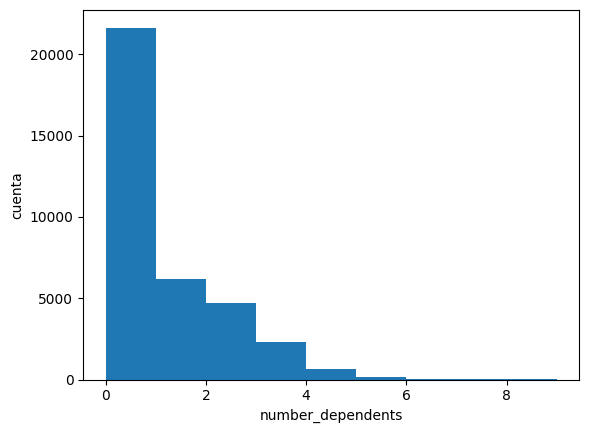

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#bins=total_tabla['last_month_salary'].quantile([0.0,0.10,.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.60,0.65,.70,0.75,.80,0.85,.90,0.95,1.0]).to_list()
plt.hist(tabla_limpia['number_dependents'],bins=range(10))
plt.xlabel("number_dependents")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

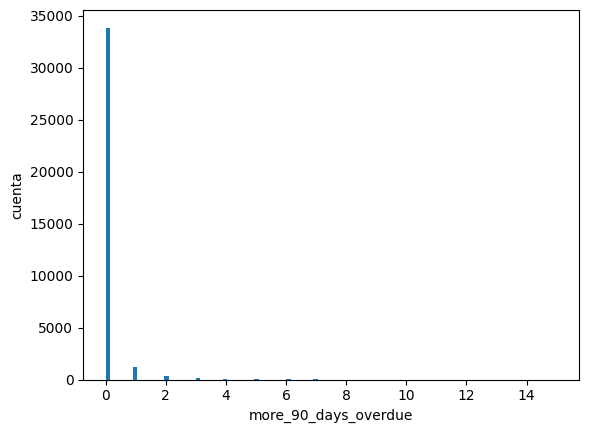

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#bins=total_tabla['last_month_salary'].quantile([0.0,0.10,.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.60,0.65,.70,0.75,.80,0.85,.90,0.95,1.0]).to_list()
plt.hist(tabla_limpia['more_90_days_overdue'],bins=100)
plt.xlabel("more_90_days_overdue")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

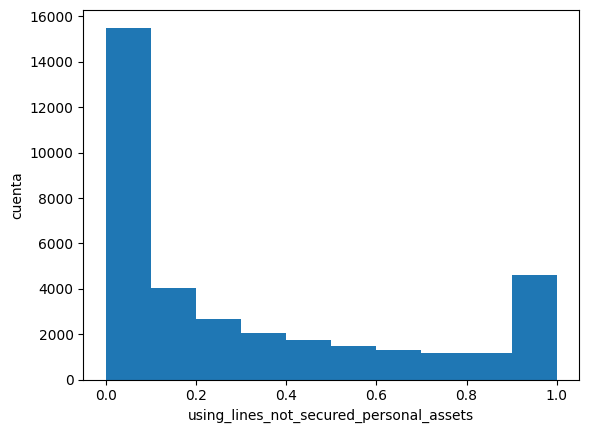

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#bins=total_tabla['last_month_salary'].quantile([0.0,0.10,.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.60,0.65,.70,0.75,.80,0.85,.90,0.95,1.0]).to_list()
plt.hist(tabla_limpia['using_lines_not_secured_personal_assets'],bins=10)
plt.xlabel("using_lines_not_secured_personal_assets")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

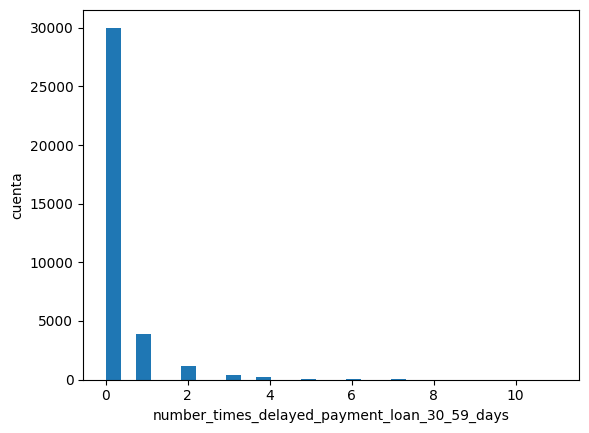

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#bins=total_tabla['last_month_salary'].quantile([0.0,0.10,.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.60,0.65,.70,0.75,.80,0.85,.90,0.95,1.0]).to_list()
plt.hist(tabla_limpia['number_times_delayed_payment_loan_30_59_days'],bins=30)
plt.xlabel("number_times_delayed_payment_loan_30_59_days")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

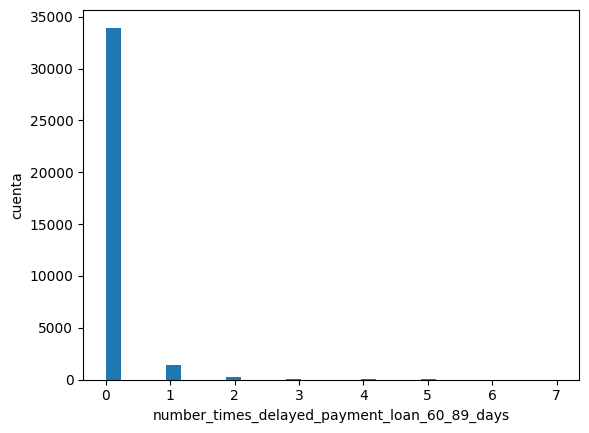

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#bins=total_tabla['last_month_salary'].quantile([0.0,0.10,.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.60,0.65,.70,0.75,.80,0.85,.90,0.95,1.0]).to_list()
plt.hist(tabla_limpia['number_times_delayed_payment_loan_60_89_days'],bins=30)
plt.xlabel("number_times_delayed_payment_loan_60_89_days")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

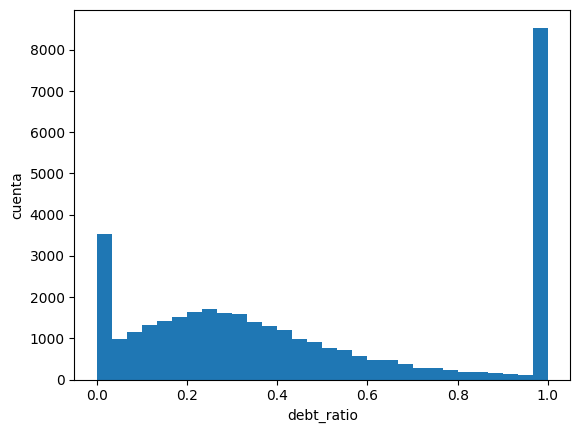

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#bins=total_tabla['last_month_salary'].quantile([0.0,0.10,.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.60,0.65,.70,0.75,.80,0.85,.90,0.95,1.0]).to_list()
plt.hist(tabla_limpia['debt_ratio'],bins=30)
plt.xlabel("debt_ratio")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

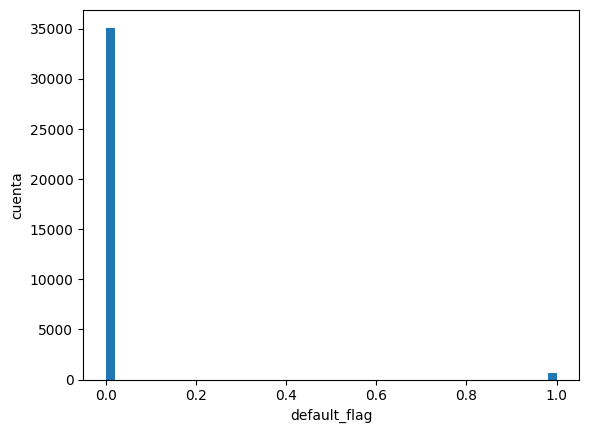

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#bins=total_tabla['last_month_salary'].quantile([0.0,0.10,.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.60,0.65,.70,0.75,.80,0.85,.90,0.95,1.0]).to_list()
plt.hist(tabla_limpia['default_flag'],bins=50)
plt.xlabel("default_flag")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

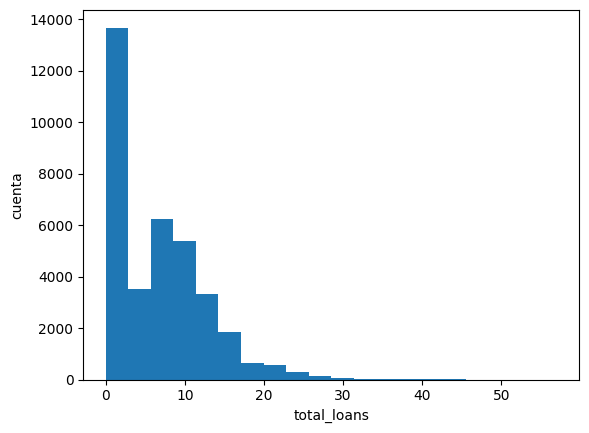

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#bins=total_tabla['last_month_salary'].quantile([0.0,0.10,.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.60,0.65,.70,0.75,.80,0.85,.90,0.95,1.0]).to_list()
plt.hist(tabla_limpia['total_loans'],bins=20)
plt.xlabel("total_loans")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

In [ ]:
matriz_correlacion=tabla_limpia.corr()
print(matriz_correlacion)

                                               user_id       age  \
user_id                                       1.000000  0.006114   
age                                           0.006114  1.000000   
last_month_salary                            -0.004365  0.040435   
number_dependents                             0.000101 -0.215806   
more_90_days_overdue                          0.000283 -0.076606   
using_lines_not_secured_personal_assets       0.002532 -0.277804   
number_times_delayed_payment_loan_30_59_days -0.004816 -0.070661   
debt_ratio                                    0.007324  0.051743   
number_times_delayed_payment_loan_60_89_days -0.005880 -0.066732   
default_flag                                 -0.010290 -0.070084   
OTHER                                         0.005694  0.155362   
REAL_ESTATE                                  -0.005964  0.044629   
total_loans                                  -0.001408  0.104696   

                                              l

<ipython-input-65-36524099d0a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion=tabla_limpia.corr()


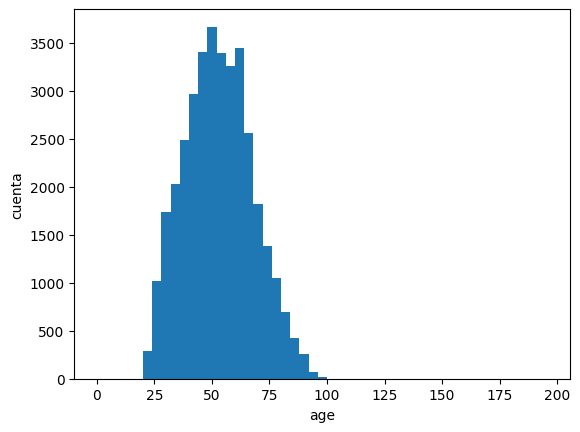

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#bins=total_tabla['last_month_salary'].quantile([0.0,0.10,.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.60,0.65,.70,0.75,.80,0.85,.90,0.95,1.0]).to_list()
plt.hist(total_tabla['age'],bins=range(0,200,4))
plt.xlabel("age")
plt.ylabel("cuenta")

# Visualización del histograma
plt.show()

In [ ]:
import numpy as np
import pandas as pd
tabla_quartil =tabla_limpia.describe()
tabla_quartil_5 = tabla_quartil.iloc[3:]
# Imprime la tabla
print(tabla_quartil_5)



     user_id   age  last_month_salary  number_dependents  \
min      1.0  21.0                0.0                0.0   
25%   9004.5  41.0             3910.5                0.0   
50%  18005.0  52.0             5200.0                0.0   
75%  27009.5  63.0             7451.0                1.0   
max  36000.0  89.0           730483.0               13.0   

     more_90_days_overdue  using_lines_not_secured_personal_assets  \
min                   0.0                                 0.000000   
25%                   0.0                                 0.030072   
50%                   0.0                                 0.150628   
75%                   0.0                                 0.547680   
max                  15.0                                 1.000000   

     number_times_delayed_payment_loan_30_59_days  debt_ratio  \
min                                           0.0    0.000000   
25%                                           0.0    0.178187   
50%                    

In [ ]:
import pandas as pd
import numpy as np
from copy import copy

# Se realiza copia de total_tabla a tabla_limpia
t_asig_quartil = copy(tabla_limpia)

# Calcular cuartiles directamente y asignarlos a nuevas columnas
quartiles = [1, 25, 50, 75, 99]  # Añadir 1 y 99 para el mínimo y máximo
for q in quartiles:
    col_name = f'Q{q}'
    t_asig_quartil[col_name] = np.percentile(t_asig_quartil['age'], q)

# Function to assign the quartile based on age
def assign_quartile(age):
    for i, q in enumerate(quartiles[1:-1]):  # Ignorar el mínimo y máximo en el bucle
        col_name = f'Q{q}'
        if age <= t_asig_quartil[col_name].values[0]:
            return i + 1
    return len(quartiles) - 1  # Asignar al cuartil 4 (máximo) si es mayor que el percentil 99

# Apply the function to each row in the 'Age' column
t_asig_quartil['Age Quartile'] = t_asig_quartil['age'].apply(assign_quartile)

# Display the resulting DataFrame
print(t_asig_quartil)
t_asig_quartil.info()

       user_id  age sex  last_month_salary  number_dependents  \
0            1   55   F             2200.0                0.0   
1            2   44   M             7499.0                0.0   
2            3   54   M             5900.0                0.0   
3            4   54   F             2167.0                0.0   
4            5   42   M            10415.0                2.0   
...        ...  ...  ..                ...                ...   
35995    35996   68   F            10833.0                0.0   
35996    35997   84   M             8456.0                0.0   
35997    35998   70   F             6000.0                0.0   
35998    35999   64   F             5045.0                0.0   
35999    36000   28   M             3500.0                0.0   

       more_90_days_overdue  using_lines_not_secured_personal_assets  \
0                         0                                 0.667083   
1                         0                                 0.007093   
2  

In [ ]:
import pandas as pd
from copy import copy

# Supongamos que 'tabla_limpia' es tu DataFrame original
# Asegúrate de tener 'default_flag' y otras columnas en tu DataFrame original

# Copia de 'tabla_limpia'
t_asignacion = copy(tabla_limpia)

# Columnas a dividir y a incluir/excluir
columnas_a_dividir = ['age', 'number_dependents', 'more_90_days_overdue',
                      'number_times_delayed_payment_loan_30_59_days',
                      'debt_ratio', 'total_loans', 'last_month_salary']

# Calculamos el porcentaje_cum para cada columna en el DataFrame existente
for columna in columnas_a_dividir:
    resultados_por_columna_mejor[columna + '_porcentaje_cum'] = resultados_por_columna_mejor[columna].cumsum() / resultados_por_columna_mejor[columna].sum()

# Crear nuevas columnas para cada sección
columnas_a_dividir = ['number_times_delayed_payment_loan_30_59_days', 'last_month_salary']
for columna in columnas_a_dividir:
    t_asignacion[columna + '_seccion'] = t_asignacion['porcentaje_cum'].apply(lambda x: 1 if x >= 0.75 else 2 if x >= 0.5 else 3 if x >= 0.25 else 4)

# Incluir los nombres de las variables en las nuevas columnas
t_asignacion.columns = t_asignacion.columns.to_series().applymap(lambda x: f"{x}_seccion")

# Dividir los datos en cuatro secciones y crear nuevas columnas
for columna in columnas_a_dividir:
    secciones = pd.cut(t_asignacion[columna], bins=4, labels=False) + 1
    nueva_columna = columna + '_seccion'
    t_asignacion[nueva_columna] = secciones

# Excluir columnas
columnas_a_excluir = ['user_id', 'sex', 'number_times_delayed_payment_loan_60_89_days', 'OTHER', 'REAL_ESTATE']
t_asignacion = t_asignacion.drop(columns=columnas_a_excluir, errors='ignore')

# Resultados por cada columna
resultados_por_columna = {}

# Relacionar secciones con 'default_flag' y contar la cantidad de ceros y unos
for columna in columnas_a_dividir:
    nueva_columna = columna + '_seccion'
    relacion_seccion_default = t_asignacion.groupby([nueva_columna, 'default_flag']).size().unstack(fill_value=0)
    resultados_por_columna[columna] = relacion_seccion_default

# Mostrar resultados
for columna, resultados in resultados_por_columna.items():
    print(f"Columna: {columna}")
    print(resultados)
    print("\n")

# Obtener el resultado con la menor cantidad de falsos negativos
menor_cantidad_falsos_negativos = float('inf')
mejor_seccion = None
for columna, resultados in resultados_por_columna.items():
    cantidad_falsos_negativos = resultados.loc[1, 2:].sum()
    if cantidad_falsos_negativos < menor_cantidad_falsos_negativos:
        menor_cantidad_falsos_negativos = cantidad_falsos_negativos
        mejor_seccion = resultados.loc[1, 2:]

# Mostrar el resultado con la menor cantidad de falsos negativos
print("Mejor seccion para la columna 'last_month_salary':")
print(mejor_seccion)
print("\n")

# Dividir el conjunto de datos en las secciones que tienen la menor cantidad de falsos negativos
secciones_para_dividir = []
for columna, resultados in resultados_por_columna.items():
    secciones_para_dividir.append(resultados.loc[1, 2:].idxmax())

# Dividir el conjunto de datos en las secciones que tienen la menor cantidad de falsos negativos
t_asignacion['mejor_seccion'] = t_asignacion['last_month_salary_seccion'].apply(lambda x: secciones_para_dividir[x - 1])

# Crear nuevas columnas para cada sección de la mejor seccion
columnas_a_dividir = ['number_times_delayed_payment_loan_30_59_days']
for columna in columnas_a_dividir:
    t_asignacion[columna + '_seccion_mejor'] = t_asignacion['mejor_seccion'].apply(lambda x: 1 if x >= 0.75 else 2 if x >= 0.5 else 3 if x >= 0.25 else 4)

# Incluir los nombres de las variables en las nuevas columnas
t_asignacion.columns = t_asignacion.columns.to_series().applymap(lambda x: f"{x}_seccion_mejor")

# Dividir los datos en cuatro secciones y crear nuevas columnas
for columna in columnas_a_dividir:
    secciones = pd.cut(t_asignacion[columna], bins=4, labels=False) + 1
    nueva_columna = columna + '_seccion_mejor'
    t_asignacion[nueva_columna] = secciones

# Excluir columnas
columnas_a_excluir = ['user_id', 'sex', 'number_times_delayed_payment_loan_60_89_days', 'OTHER', 'REAL_ESTATE', 'last_month_salary_seccion']
t_asignacion = t_asignacion.drop(columns=columnas_a_excluir, errors='ignore')

# Resultados por cada columna
resultados_por_columna_mejor = {}

# Relacionar secciones con 'default_flag' y contar la cantidad de ceros y unos
for columna in columnas_a_dividir:
    nueva_columna = columna + '_seccion_mejor'
    relacion_seccion_default = t_asignacion.groupby([nueva_columna, 'default_flag']).size().unstack(fill_value=0)
    resultados_por_columna_mejor[columna] = relacion_seccion_default

# Mostrar resultados
for columna, resultados in resultados_por_columna_mejor.items():
    print(f"Columna: {columna}")
    print(resultados)
    print("\n")

# Crear la tabla de confusión
t_confusion = pd.crosstab(t_asignacion['number_times_delayed_payment_loan_30_59_days_seccion_mejor'], t_asignacion['default_flag'], rownames=['Predicción: Sin seccionar'], colnames=['Real: No seccionó'])

# Calcular métricas de rendimiento
metricas_rendimiento = metrics.confusion_matrix(t_asignacion['number_times_delayed_payment_loan_30_59_days_seccion_mejor'], t_asignacion['default_flag'])
metricas_rendimiento = pd.DataFrame(metricas_rendimiento, columns=['Real: No seccionó', 'Real: Seccionó'], index=['Predicción: Sin seccionar', 'Predicción: Seccionó'])

# Mostrar la tabla de confusión
print("Tabla de confusión:")
print(t_confusion)
print("\n")

# Mostrar las métricas de rendimiento
print("Métricas de rendimiento:")
print(metricas_rendimiento)
print("\n")

# Calcular las métricas del rendimiento de las secciones
t_rendimiento_secciones = pd.DataFrame()

for columna in columnas_a_dividir:
    nueva_columna = columna + '_seccion_mejor'
    t_rendimiento_secciones[columna] = metrics.classification_report(t_asignacion[nueva_columna], t_asignacion['default_flag'], output_dict=True)

# Mostrar las métricas del rendimiento de las secciones
print("Métricas del rendimiento de las secciones:")
print(t_rendimiento_secciones)
print("\n")

# Calcular las métricas del rendimiento del modelo completo
t_rendimiento_completo = metrics.classification_report(t_asignacion['default_flag'], t_asignacion['default_flag'], output_dict=True)

# Mostrar las métricas del rendimiento del modelo completo
print("Métricas del rendimiento del modelo completo:")
print(t_rendimiento_completo)
print("\n")

# Comparar el rendimiento del modelo completo con las secciones
print("Comparación del rendimiento del modelo completo con las secciones:")
for columna in columnas_a_dividir:
    t_rendimiento_completo[columna] = t_rendimiento_completo[columna]['f1-score']
    t_rendimiento_secciones[columna]['F1-Score_Mejor Seccion'] = t_rendimiento_secciones[columna]['f1-score']
    t_rendimiento_completo[columna] = t_rendimiento_completo[columna].apply(lambda x: f"{x * 100:.2f}%")
    t_rendimiento_secciones[columna]['F1-Score_Mejor Seccion'] = t_rendimiento_secciones[columna]['F1-Score_Mejor Seccion'].apply(lambda x: f"{x * 100:.2f}%")
    print(f"{columna}: F1-Score_Modelo Completo: {t_rendimiento_completo[columna]}, F1-Score_Mejor Seccion: {t_rendimiento_secciones[columna]['F1-Score_Mejor Seccion']}")

print("\n")

# Guardar los resultados en un archivo CSV
resultados_por_columna_mejor = pd.DataFrame(resultados_por_columna_mejor)
resultados_por_columna_mejor.to_csv('resultados_por_columna_mejor.csv', index=False)
t_rendimiento_secciones.to_csv('t_rendimiento_secciones.csv', index=False)
t_rendimiento



NameError: ignored

In [ ]:
t_asig_quartil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35755 entries, 0 to 35999
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       35755 non-null  int64  
 1   age                                           35755 non-null  int64  
 2   sex                                           35755 non-null  object 
 3   last_month_salary                             35755 non-null  float64
 4   number_dependents                             35755 non-null  float64
 5   more_90_days_overdue                          35755 non-null  int64  
 6   using_lines_not_secured_personal_assets       35755 non-null  float64
 7   number_times_delayed_payment_loan_30_59_days  35755 non-null  int64  
 8   debt_ratio                                    35755 non-null  float64
 9   number_times_delayed_payment_loan_60_89_days  35755 non-null 

In [ ]:
import pandas as pd
import numpy as np
from copy import copy

# Se realiza copia de total_tabla a tabla_limpia


# Calcular cuartiles directamente y asignarlos a nuevas columnas
quartiles = [1, 25, 50, 75, 99]  # Añadir 1 y 99 para el mínimo y máximo
for q in quartiles:
    col_name = f'Q{q}'
    t_asig_quartil[col_name] = np.percentile(t_asig_quartil['more_90_days_overdue'], q)

# Function to assign the quartile based on age
def assign_quartile(more_90_days_overdue):
    for i, q in enumerate(quartiles[1:-1]):  # Ignorar el mínimo y máximo en el bucle
        col_name = f'Q{q}'
        if more_90_days_overdue <= t_asig_quartil[col_name].values[0]:
            return i + 1
    return len(quartiles) - 1  # Asignar al cuartil 4 (máximo) si es mayor que el percentil 99

# Apply the function to each row in the 'Age' column
t_asig_quartil['more_90_days_overdue Quartile'] = t_asig_quartil['more_90_days_overdue'].apply(assign_quartile)

# Display the resulting DataFrame
print(t_asig_quartil)
t_asig_quartil.info()

       user_id  age sex  last_month_salary  number_dependents  \
0            1   55   F             2200.0                0.0   
1            2   44   M             7499.0                0.0   
2            3   54   M             5900.0                0.0   
3            4   54   F             2167.0                0.0   
4            5   42   M            10415.0                2.0   
...        ...  ...  ..                ...                ...   
35995    35996   68   F            10833.0                0.0   
35996    35997   84   M             8456.0                0.0   
35997    35998   70   F             6000.0                0.0   
35998    35999   64   F             5045.0                0.0   
35999    36000   28   M             3500.0                0.0   

       more_90_days_overdue  using_lines_not_secured_personal_assets  \
0                         0                                 0.667083   
1                         0                                 0.007093   
2  

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import re

# Define the last_month_salary ranges for each quartile
quartile_last_month_salary_ranges = [
    (0, 3910.5),
    (3910.5, 5200),
    (5200, 7451),
    (7451, 730483)
]

# Function to assign the quartile based on age
def assign_quartile(last_month_salary):
    for i, last_month_salary_range in enumerate(quartile_last_month_salary_ranges):
        if last_month_salary_range[0] <= last_month_salary < last_month_salary_range[1]:
            return i + 1
    return None

# Apply the function to each row in the 'Age' column
t_asig_quartil['salary_Quartile'] = t_asig_quartil['last_month_salary'].apply(assign_quartile)

t_asig_quartil.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35755 entries, 0 to 35999
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       35755 non-null  int64  
 1   age                                           35755 non-null  int64  
 2   sex                                           35755 non-null  object 
 3   last_month_salary                             35755 non-null  float64
 4   number_dependents                             35755 non-null  float64
 5   more_90_days_overdue                          35755 non-null  int64  
 6   using_lines_not_secured_personal_assets       35755 non-null  float64
 7   number_times_delayed_payment_loan_30_59_days  35755 non-null  int64  
 8   debt_ratio                                    35755 non-null  float64
 9   number_times_delayed_payment_loan_60_89_days  35755 non-null 

In [ ]:
t_asig_quartil.head(15)

,user_id,age,sex,last_month_salary,number_dependents,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days,...,REAL_ESTATE,total_loans,Q1,Q25,Q50,Q75,Q99,Age Quartile,more_90_days_overdue Quartile,salary_Quartile
0,1,55,F,2200.0,0.0,0,0.667083,0,0.153112,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3,1,1.0
1,2,44,M,7499.0,0.0,0,0.007093,0,0.148800,0,...,1.0,20.0,0.0,0.0,0.0,0.0,2.0,2,1,4.0
2,3,54,M,5900.0,0.0,0,0.091213,0,0.351635,1,...,1.0,15.0,0.0,0.0,0.0,0.0,2.0,3,1,3.0
3,4,54,F,2167.0,0.0,0,0.112680,0,0.065959,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3,1,1.0
4,5,42,M,10415.0,2.0,0,0.323985,0,0.352151,0,...,2.0,8.0,0.0,0.0,0.0,0.0,2.0,2,1,4.0
5,6,63,F,4368.0,0.0,0,0.007300,0,0.002289,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3,1,2.0
6,7,76,M,1700.0,0.0,0,0.000000,1,0.261611,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4,1,1.0
7,8,55,M,15658.0,0.0,1,0.062280,0,0.406667,0,...,3.0,14.0,0.0,0.0,0.0,0.0,2.0,3,4,4.0
8,9,41,M,8441.0,0.0,0,0.479899,1,0.209903,0,...,3.0,6.0,0.0,0.0,0.0,0.0,2.0,1,1,4.0
9,10,49,F,200.0,0.0,0,0.040263,0,1.000000,0,...,2.0,7.0,0.0,0.0,0.0,0.0,2.0,2,1,1.0


In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'age'
datos = tabla_limpia['age'].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)
# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')
# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de Shapiro: 0.9900801777839661
P-valor: 9.598894480624997e-43
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'total_loans'
datos = tabla_limpia['total_loans'].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)
# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')
# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de Shapiro: 0.8718435764312744
P-valor: 0.0
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'more_90_days_overdue'
datos = tabla_limpia['more_90_days_overdue'].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)
# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')
# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de Shapiro: 0.17375928163528442
P-valor: 0.0
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


In [ ]:
import pandas as pd
from copy import copy

# Supongamos que 'tabla_limpia' es tu DataFrame original
# Asegúrate de tener 'default_flag' y otras columnas en tu DataFrame original

# Copia de 'tabla_limpia'
t_asignacion = copy(tabla_limpia)

# Columnas a dividir y a incluir/excluir
columnas_a_dividir = ['age', 'number_dependents', 'more_90_days_overdue',
                      'number_times_delayed_payment_loan_30_59_days',
                      'debt_ratio', 'total_loans', 'last_month_salary']

columnas_a_excluir = ['user_id', 'sex', 'number_times_delayed_payment_loan_60_89_days', 'OTHER', 'REAL_ESTATE']

# Excluir columnas
t_asignacion = t_asignacion.drop(columns=columnas_a_excluir, errors='ignore')

# Resultados por cada columna
resultados_por_columna = {}

# Totales de 0 y 1 en toda la columna 'default_flag'
total_default_0 = t_asignacion['default_flag'].eq(0).sum()
total_default_1 = t_asignacion['default_flag'].eq(1).sum()

# Dividir en cuatro secciones y crear nuevas columnas
for columna in columnas_a_dividir:
    # Utilizar qcut con labels=False para obtener los límites de los bins
    _, bins = pd.qcut(t_asignacion[columna], q=[0, 0.25, 0.5, 0.75, 1.0], labels=False, retbins=True)

    # Asignar manualmente etiquetas a las secciones
    etiquetas = [f'Seccion_{i+1}' for i in range(len(bins)-1)]

    t_asignacion[columna + '_seccion'] = pd.cut(t_asignacion[columna], bins=bins, labels=etiquetas, include_lowest=True)

    # Relacionar secciones con 'default_flag' y contar la cantidad de ceros y unos
    relacion_seccion_default = t_asignacion.groupby([columna + '_seccion', 'default_flag']).size().unstack(fill_value=0)

    # Calcular proporciones
    relacion_seccion_default['proporcion_0'] = relacion_seccion_default[0] / total_default_0
    relacion_seccion_default['proporcion_1'] = relacion_seccion_default[1] / total_default_1

    resultados_por_columna[columna] = relacion_seccion_default

# Mostrar resultados por cada columna
for columna, resultado in resultados_por_columna.items():
    print(f"Resultados para {columna}:")
    print(resultado)
    print()

ValueError: ignored

In [ ]:
import pandas as pd

# Suponiendo que 't_asignacion' es tu DataFrame con las columnas adecuadas
# Asegúrate de tener la columna 'default_flag' que indica si hay incumplimiento

# Calcular totales
total_default_1 = t_asignacion['default_flag'].eq(1).sum()
total_default_0 = t_asignacion['default_flag'].eq(0).sum()

# Filtrar por secciones deseadas
secciones_deseadas = [1, 2, 3, 4]
t_asignacion_filtrado = t_asignacion[t_asignacion['age_seccion'].isin(secciones_deseadas)]

# Calcular ratios
t_asignacion_filtrado['ratio_default_1'] = t_asignacion_filtrado['default_flag'].eq(1) / total_default_1
t_asignacion_filtrado['ratio_default_0'] = t_asignacion_filtrado['default_flag'].eq(0) / total_default_0
t_asignacion_filtrado['ratio_default_1_to_0'] = t_asignacion_filtrado['ratio_default_1'] / t_asignacion_filtrado['ratio_default_0']
t_asignacion_filtrado['ratio_default_0_to_1'] = t_asignacion_filtrado['ratio_default_0'] / t_asignacion_filtrado['ratio_default_1']

# Seleccionar columnas necesarias
resultado = t_asignacion_filtrado[[
    'age_seccion', 'number_dependents_seccion', 'more_90_days_overdue_seccion',
    'number_times_delayed_payment_loan_30_59_days_seccion', 'debt_ratio_seccion', 'total_loans_seccion',
    'ratio_default_1', 'ratio_default_0', 'ratio_default_1_to_0', 'ratio_default_0_to_1'
]]

# Mostrar resultados
print(resultado)

       age_seccion  number_dependents_seccion  more_90_days_overdue_seccion  \
0                2                          1                             1   
1                2                          1                             1   
2                2                          1                             1   
3                2                          1                             1   
4                2                          1                             1   
...            ...                        ...                           ...   
35995            3                          1                             1   
35996            4                          1                             1   
35997            3                          1                             1   
35998            3                          1                             1   
35999            1                          1                             1   

       number_times_delayed_payment_loan_30_59_days